In [2]:
#libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#set multiple outputs for a cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
#to load datasets

products = pd.read_csv("C:/Users/Filip/Desktop/kbc/products.csv", sep=';')
inflow = pd.read_csv("C:/Users\Filip/Desktop\kbc/inflow.csv", sep=';')
sales = pd.read_csv("C:/Users\Filip/Desktop\kbc/sales.csv", sep=';')
soc_dem = pd.read_csv("C:/Users\Filip/Desktop\kbc/soc_dem.csv", sep=';')

In [5]:
#EDA

In [6]:
products.columns
inflow.columns
sales.columns
soc_dem.columns

Index(['Client', 'Count_CA', 'Count_SA', 'Count_MF', 'Count_OVD', 'Count_CC',
       'Count_CL', 'ActBal_CA', 'ActBal_SA', 'ActBal_MF', 'ActBal_OVD',
       'ActBal_CC', 'ActBal_CL'],
      dtype='object')

Index(['Client', 'VolumeCred', 'VolumeCred_CA', 'TransactionsCred',
       'TransactionsCred_CA', 'VolumeDeb', 'VolumeDeb_CA',
       'VolumeDebCash_Card', 'VolumeDebCashless_Card',
       'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA',
       'TransactionsDebCash_Card', 'TransactionsDebCashless_Card',
       'TransactionsDeb_PaymentOrder'],
      dtype='object')

Index(['Client', 'Sale_MF', 'Sale_CC', 'Sale_CL', 'Revenue_MF', 'Revenue_CC',
       'Revenue_CL'],
      dtype='object')

Index(['Client', 'Sex', 'Age', 'Tenure'], dtype='object')

In [7]:
#Common variable for all datasets: Client - will be useful for merging

In [8]:
#check sizes of individual datasets
products.shape
inflow.shape
sales.shape
soc_dem.shape

(1615, 13)

(1587, 15)

(969, 7)

(1615, 4)

In [9]:
#check duplicates
len(products['Client'].unique()) - products.shape[0]
len(inflow['Client'].unique()) - inflow.shape[0]
len(sales['Client'].unique()) - sales.shape[0]
len(soc_dem['Client'].unique()) - soc_dem.shape[0]

0

0

0

0

In [10]:
#No duplicates of Client IDs = some datasets contain info about more customers than others, no equal lengths

In [11]:
#counting missing values
products.isnull().sum()
inflow.isnull().sum()
sales.isnull().sum()
soc_dem.isnull().sum()

Client           0
Count_CA         0
Count_SA      1189
Count_MF      1309
Count_OVD     1196
Count_CC      1445
Count_CL      1480
ActBal_CA        0
ActBal_SA     1189
ActBal_MF     1309
ActBal_OVD    1196
ActBal_CC     1445
ActBal_CL     1480
dtype: int64

Client                          0
VolumeCred                      0
VolumeCred_CA                   0
TransactionsCred                0
TransactionsCred_CA             0
VolumeDeb                       0
VolumeDeb_CA                    0
VolumeDebCash_Card              0
VolumeDebCashless_Card          0
VolumeDeb_PaymentOrder          0
TransactionsDeb                 0
TransactionsDeb_CA              0
TransactionsDebCash_Card        0
TransactionsDebCashless_Card    0
TransactionsDeb_PaymentOrder    0
dtype: int64

Client        0
Sale_MF       0
Sale_CC       0
Sale_CL       0
Revenue_MF    0
Revenue_CC    0
Revenue_CL    0
dtype: int64

Client    0
Sex       3
Age       0
Tenure    0
dtype: int64

In [12]:
#filling sex variable missings
soc_dem['Sex']=soc_dem['Sex'].fillna(soc_dem['Sex'].mode()[0])

In [13]:
#checking if missings in these columns are meant as 0 values

for col in products.columns:
    print (col, len(products.loc[products[col] > 0]))

Client 1615
Count_CA 1615
Count_SA 426
Count_MF 306
Count_OVD 419
Count_CC 170
Count_CL 135
ActBal_CA 1521
ActBal_SA 410
ActBal_MF 195
ActBal_OVD 120
ActBal_CC 149
ActBal_CL 134


In [14]:
#filling with 0 as number of missings = number of obs not bigger than 0
for col in products.columns:
    products[col] = np.where(products[col].isnull() , 0, products[col])

In [15]:
#control
products.isnull().sum()

Client        0
Count_CA      0
Count_SA      0
Count_MF      0
Count_OVD     0
Count_CC      0
Count_CL      0
ActBal_CA     0
ActBal_SA     0
ActBal_MF     0
ActBal_OVD    0
ActBal_CC     0
ActBal_CL     0
dtype: int64

In [16]:
#merging, left join with soc_dem stats as the main table join is based on
dataset = products.merge(soc_dem,on='Client', how='left').merge(sales,on='Client', how='left').merge(inflow,on='Client', how='left')

In [17]:
#control formats
dataset.dtypes

Client                            int64
Count_CA                          int64
Count_SA                        float64
Count_MF                        float64
Count_OVD                       float64
Count_CC                        float64
Count_CL                        float64
ActBal_CA                       float64
ActBal_SA                       float64
ActBal_MF                       float64
ActBal_OVD                      float64
ActBal_CC                       float64
ActBal_CL                       float64
Sex                              object
Age                               int64
Tenure                            int64
Sale_MF                         float64
Sale_CC                         float64
Sale_CL                         float64
Revenue_MF                      float64
Revenue_CC                      float64
Revenue_CL                      float64
VolumeCred                      float64
VolumeCred_CA                   float64
TransactionsCred                float64


In [18]:
#again check of missings after join of tables of different lenghts

dataset.isnull().sum()

Client                            0
Count_CA                          0
Count_SA                          0
Count_MF                          0
Count_OVD                         0
Count_CC                          0
Count_CL                          0
ActBal_CA                         0
ActBal_SA                         0
ActBal_MF                         0
ActBal_OVD                        0
ActBal_CC                         0
ActBal_CL                         0
Sex                               0
Age                               0
Tenure                            0
Sale_MF                         646
Sale_CC                         646
Sale_CL                         646
Revenue_MF                      646
Revenue_CC                      646
Revenue_CL                      646
VolumeCred                       28
VolumeCred_CA                    28
TransactionsCred                 28
TransactionsCred_CA              28
VolumeDeb                        28
VolumeDeb_CA                

In [19]:
#repalcing missings with mean values - the ones eligible for that, data about flows, not sales (only 28 missings each)
for col in [features for features in dataset.columns if dataset[features].isnull().sum()>0][6:]:
    dataset[col]=dataset[col].fillna(dataset[col].mean())

In [20]:
#descriptive statistics

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(dataset.describe())

            Client     Count_CA     Count_SA     Count_MF    Count_OVD  \
count  1615.000000  1615.000000  1615.000000  1615.000000  1615.000000   
mean    808.000000     1.078638     0.307740     0.886068     0.259443   
std     466.354658     0.333035     0.567639     3.871786     0.438465   
min       1.000000     1.000000     0.000000     0.000000     0.000000   
25%     404.500000     1.000000     0.000000     0.000000     0.000000   
50%     808.000000     1.000000     0.000000     0.000000     0.000000   
75%    1211.500000     1.000000     1.000000     0.000000     1.000000   
max    1615.000000     4.000000     5.000000    79.000000     1.000000   

          Count_CC     Count_CL      ActBal_CA      ActBal_SA      ActBal_MF  \
count  1615.000000  1615.000000    1615.000000    1615.000000    1615.000000   
mean      0.105263     0.099071    2438.601941    4009.812781    3887.532659   
std       0.306987     0.360837    7072.777349   17909.061545   34868.010170   
min       0.0

In [21]:
#creating new variable that compares credit vs debit volumes

dataset['credit-debit'] = dataset['VolumeCred'] - dataset['VolumeDeb'] 

array([[<AxesSubplot:title={'center':'Client'}>,
        <AxesSubplot:title={'center':'Count_CA'}>,
        <AxesSubplot:title={'center':'Count_SA'}>,
        <AxesSubplot:title={'center':'Count_MF'}>,
        <AxesSubplot:title={'center':'Count_OVD'}>,
        <AxesSubplot:title={'center':'Count_CC'}>],
       [<AxesSubplot:title={'center':'Count_CL'}>,
        <AxesSubplot:title={'center':'ActBal_CA'}>,
        <AxesSubplot:title={'center':'ActBal_SA'}>,
        <AxesSubplot:title={'center':'ActBal_MF'}>,
        <AxesSubplot:title={'center':'ActBal_OVD'}>,
        <AxesSubplot:title={'center':'ActBal_CC'}>],
       [<AxesSubplot:title={'center':'ActBal_CL'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'Sale_MF'}>,
        <AxesSubplot:title={'center':'Sale_CC'}>,
        <AxesSubplot:title={'center':'Sale_CL'}>],
       [<AxesSubplot:title={'center':'Revenue_MF'}>,
        <AxesSubplot:title={'c

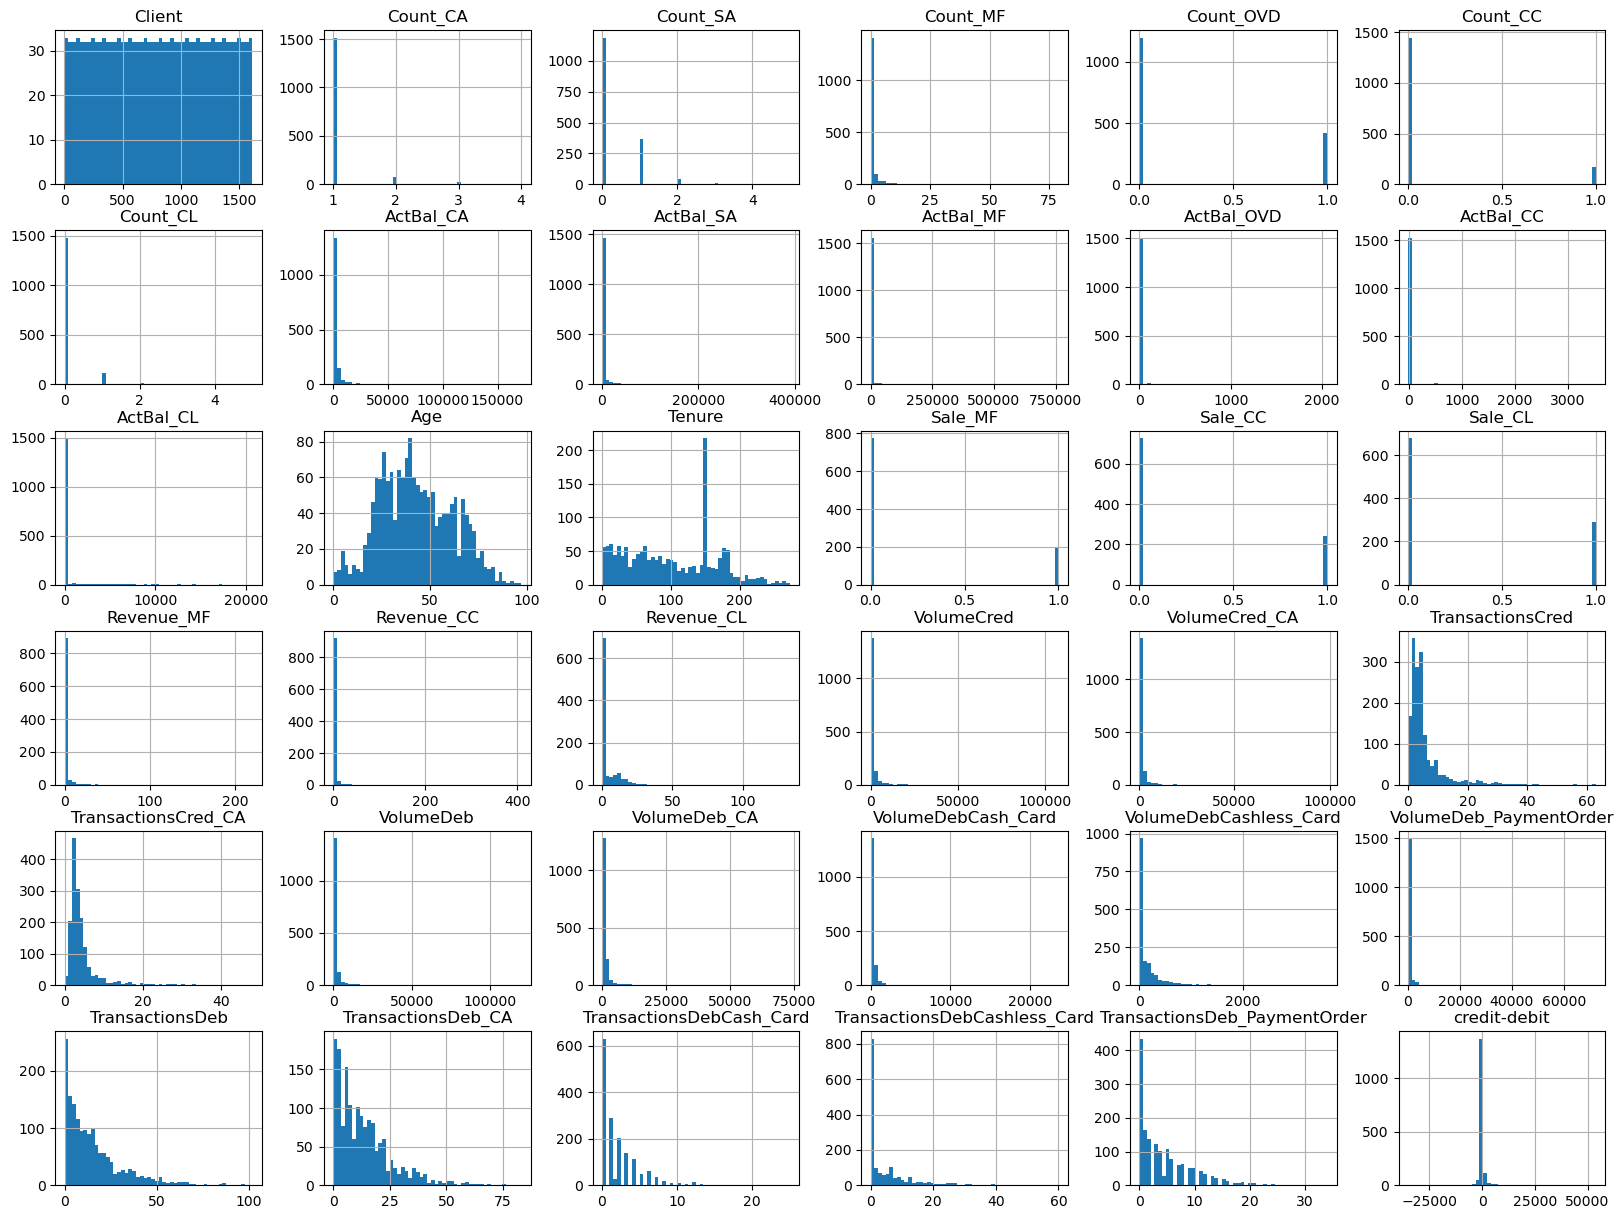

In [22]:
#basic vizs of distributions
%matplotlib inline 
dataset.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:>

Text(0, 0.5, 'Client')

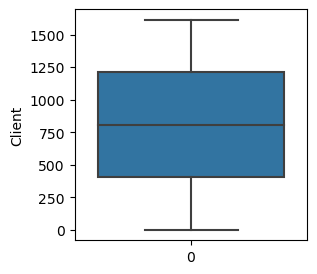

<AxesSubplot:>

Text(0, 0.5, 'Count_CA')

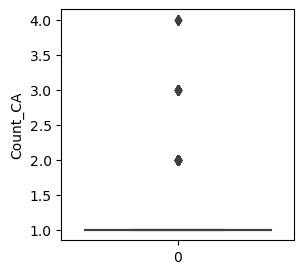

<AxesSubplot:>

Text(0, 0.5, 'Count_SA')

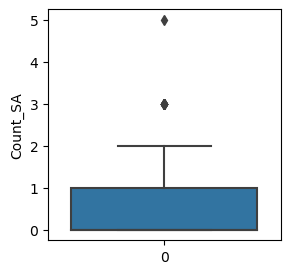

<AxesSubplot:>

Text(0, 0.5, 'Count_MF')

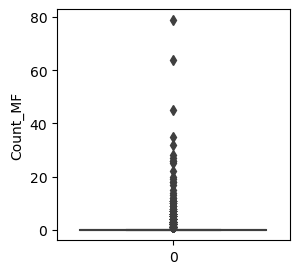

<AxesSubplot:>

Text(0, 0.5, 'Count_OVD')

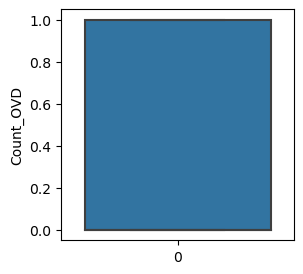

<AxesSubplot:>

Text(0, 0.5, 'Count_CC')

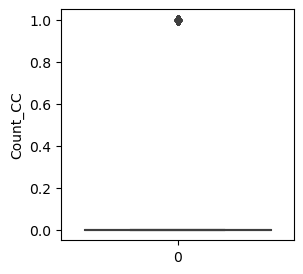

<AxesSubplot:>

Text(0, 0.5, 'Count_CL')

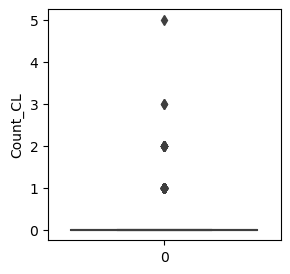

<AxesSubplot:>

Text(0, 0.5, 'ActBal_CA')

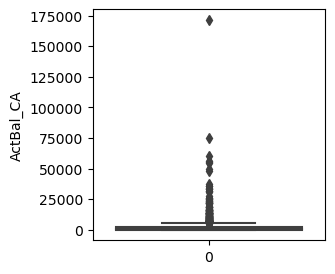

<AxesSubplot:>

Text(0, 0.5, 'ActBal_SA')

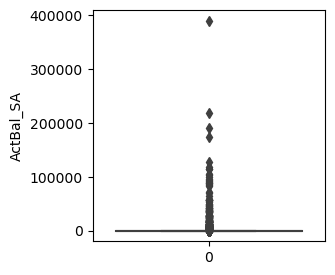

<AxesSubplot:>

Text(0, 0.5, 'ActBal_MF')

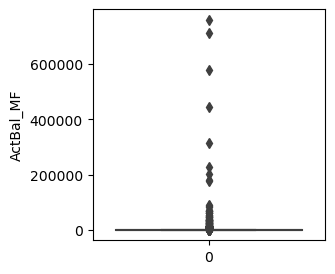

<AxesSubplot:>

Text(0, 0.5, 'ActBal_OVD')

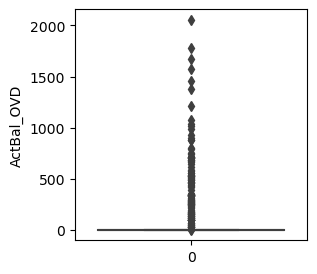

<AxesSubplot:>

Text(0, 0.5, 'ActBal_CC')

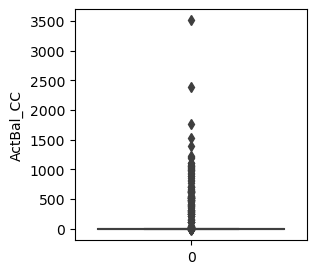

<AxesSubplot:>

Text(0, 0.5, 'ActBal_CL')

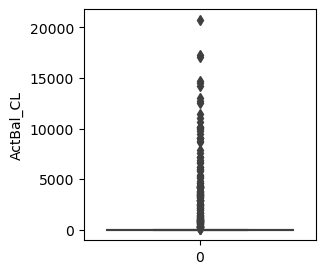

<AxesSubplot:>

Text(0, 0.5, 'Age')

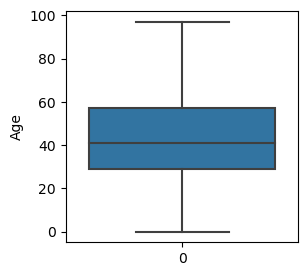

<AxesSubplot:>

Text(0, 0.5, 'Tenure')

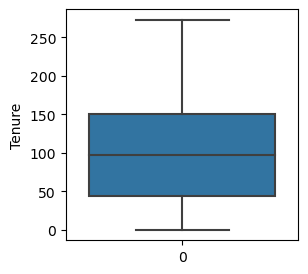

<AxesSubplot:>

Text(0, 0.5, 'Sale_MF')

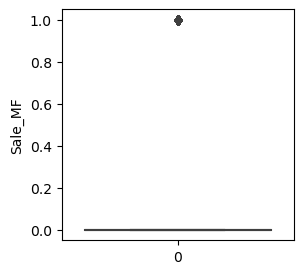

<AxesSubplot:>

Text(0, 0.5, 'Sale_CC')

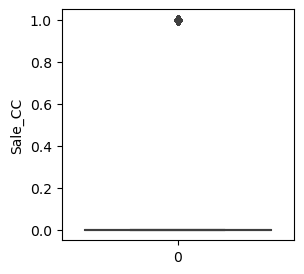

<AxesSubplot:>

Text(0, 0.5, 'Sale_CL')

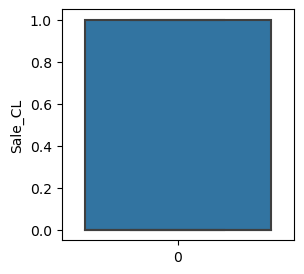

<AxesSubplot:>

Text(0, 0.5, 'Revenue_MF')

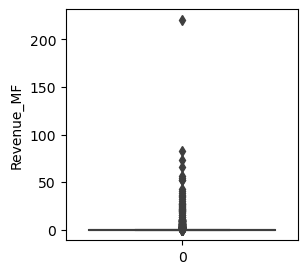

<AxesSubplot:>

Text(0, 0.5, 'Revenue_CC')

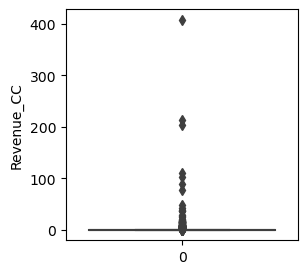

<AxesSubplot:>

Text(0, 0.5, 'Revenue_CL')

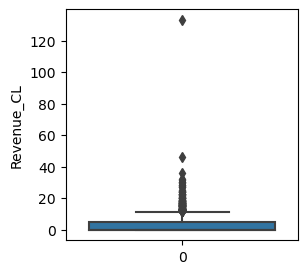

<AxesSubplot:>

Text(0, 0.5, 'VolumeCred')

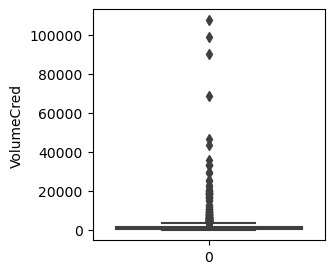

<AxesSubplot:>

Text(0, 0.5, 'VolumeCred_CA')

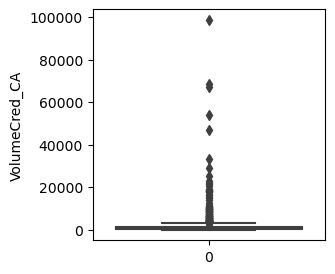

<AxesSubplot:>

Text(0, 0.5, 'TransactionsCred')

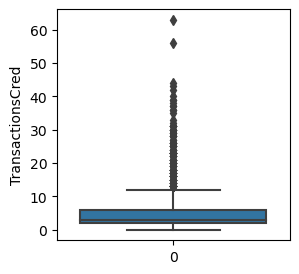

<AxesSubplot:>

Text(0, 0.5, 'TransactionsCred_CA')

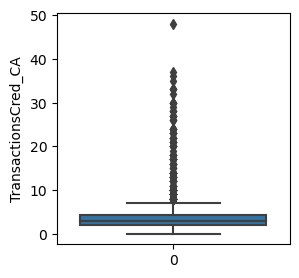

<AxesSubplot:>

Text(0, 0.5, 'VolumeDeb')

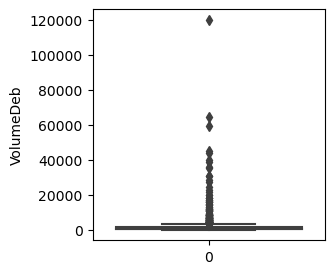

<AxesSubplot:>

Text(0, 0.5, 'VolumeDeb_CA')

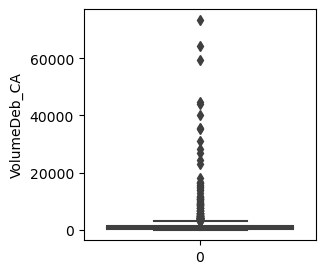

<AxesSubplot:>

Text(0, 0.5, 'VolumeDebCash_Card')

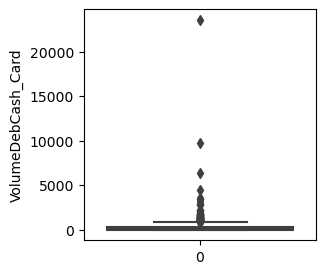

<AxesSubplot:>

Text(0, 0.5, 'VolumeDebCashless_Card')

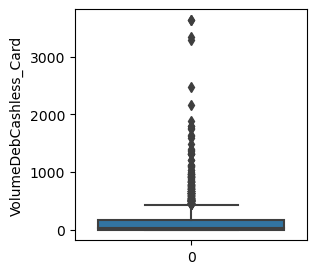

<AxesSubplot:>

Text(0, 0.5, 'VolumeDeb_PaymentOrder')

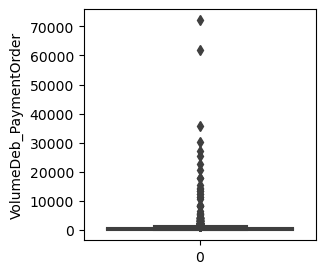

<AxesSubplot:>

Text(0, 0.5, 'TransactionsDeb')

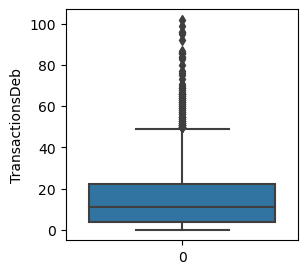

<AxesSubplot:>

Text(0, 0.5, 'TransactionsDeb_CA')

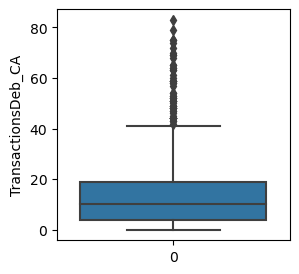

<AxesSubplot:>

Text(0, 0.5, 'TransactionsDebCash_Card')

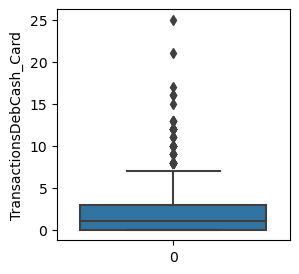

<AxesSubplot:>

Text(0, 0.5, 'TransactionsDebCashless_Card')

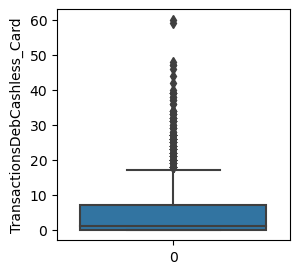

<AxesSubplot:>

Text(0, 0.5, 'TransactionsDeb_PaymentOrder')

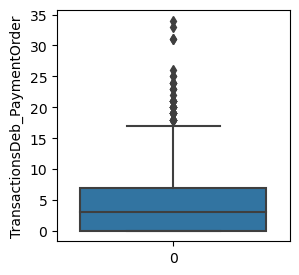

<AxesSubplot:>

Text(0, 0.5, 'credit-debit')

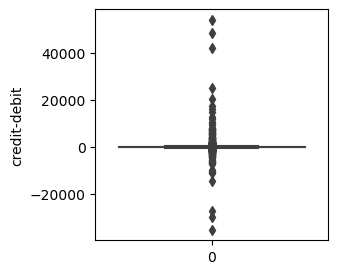

In [23]:
#checking suspicious values and outliers
plt.rcParams['figure.figsize']=(3,3)

only_numericals = [features for features in dataset.select_dtypes('number').columns ]

for variable in only_numericals:
    sns.boxplot(data=dataset[variable])
    plt.ylabel(variable)
    plt.show()

In [24]:
#founds ages under 18, lets assume those are incorrect values stored as we would focus primarily on adults and u18 cannot take a loan etc
dataset = dataset.loc[dataset['Age']>17]

(array([ 22., 159., 290., 295., 234., 196., 175.,  99.,  36.,   9.]),
 array([ -32. ,   79.7,  191.4,  303.1,  414.8,  526.5,  638.2,  749.9,
         861.6,  973.3, 1085. ]),
 <BarContainer object of 10 artists>)

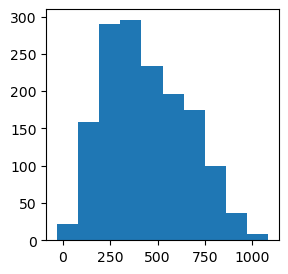

In [25]:
#checking if tenure correspondts with age data,
dataset['tenure_check'] = dataset['Age']*12 - (dataset['Tenure'])
plt.hist(dataset['tenure_check'])

In [28]:
#if age in months is lower than tenure, observations deleted to ensure data quality
dataset = dataset.loc[dataset['tenure_check']>=0]
dataset.drop('tenure_check', axis=1, inplace= True)

In [47]:
#proportions of sales and no sales

sales.groupby(['Sale_CL']).size() / len(sales)
sales.groupby(['Sale_CC']).size() / len(sales)
sales.groupby(['Sale_MF']).size() / len(sales)

Sale_CL
0    0.700722
1    0.299278
dtype: float64

Sale_CC
0    0.750258
1    0.249742
dtype: float64

Sale_MF
0    0.800826
1    0.199174
dtype: float64

In [42]:
#differences in inflows and outflows based on sale/nosale
#sale of loan or credit card = higher avg outflow than inflow
#sale of MF = higher avg inflow than outlow = spare resources to invest

dataset.groupby(['Sale_CL'])['credit-debit'].mean(numeric_only=True)
dataset.groupby(['Sale_CC'])['credit-debit'].mean(numeric_only=True)
dataset.groupby(['Sale_MF'])['credit-debit'].mean(numeric_only=True)

Sale_CL
0.0    307.895578
1.0   -261.106390
Name: credit-debit, dtype: float64

Sale_CC
0.0    245.333651
1.0   -139.605031
Name: credit-debit, dtype: float64

Sale_MF
0.0     74.868252
1.0    435.809356
Name: credit-debit, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='count'>

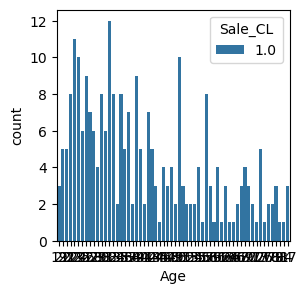

In [31]:
#sales by age
sns.countplot(x='Age', hue='Sale_CL', data=dataset.loc[dataset['Sale_CL']==1])

<AxesSubplot:xlabel='Age', ylabel='count'>

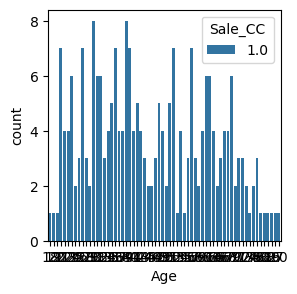

In [32]:
sns.countplot(x='Age', hue='Sale_CC', data=dataset.loc[dataset['Sale_CC']==1])

<AxesSubplot:xlabel='Age', ylabel='count'>

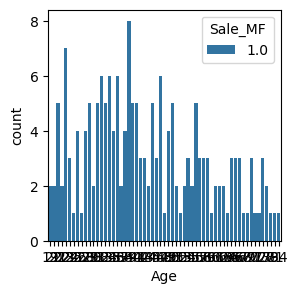

In [33]:
sns.countplot(x='Age', hue='Sale_MF', data=dataset.loc[dataset['Sale_MF']==1])

<AxesSubplot:xlabel='count', ylabel='Tenure'>

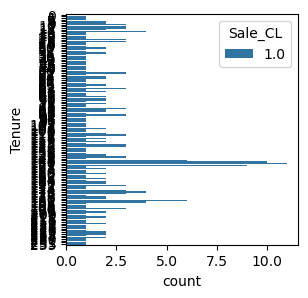

In [34]:
#sales by tenure
sns.countplot(y='Tenure', hue='Sale_CL', data=dataset.loc[dataset['Sale_CL']==1])

In [49]:
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\Filip\AppData\Local\Temp\ipykernel_20876\1718432862.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Client,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL,Age,Tenure,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL,VolumeCred,VolumeCred_CA,TransactionsCred,TransactionsCred_CA,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,credit-debit,Sex__F,Sex__M
Client,1.00,-0.00,-0.05,-0.07,0.04,0.04,0.00,0.06,-0.06,-0.04,0.06,-0.01,-0.03,0.00,0.00,0.01,0.00,0.03,-0.07,0.01,0.04,-0.02,-0.02,0.02,0.02,0.00,0.00,0.01,-0.02,0.03,0.02,-0.01,-0.02,0.03,-0.02,-0.05,-0.01,0.01
Count_CA,-0.00,1.00,0.01,-0.03,0.00,-0.00,0.01,-0.01,-0.00,0.03,-0.01,0.02,0.01,0.04,0.04,0.01,-0.03,0.10,0.00,-0.02,0.07,0.01,0.01,0.01,0.02,0.03,0.01,-0.02,0.01,0.02,0.04,0.03,0.01,0.04,0.03,-0.03,-0.03,0.03
Count_SA,-0.05,0.01,1.00,0.18,-0.01,0.10,-0.08,0.04,0.32,0.08,0.00,0.00,-0.06,0.06,0.02,0.01,0.10,0.05,0.02,0.01,0.06,0.10,0.07,0.08,-0.03,0.10,0.08,0.02,0.04,0.06,0.00,-0.01,-0.06,0.00,0.09,0.03,0.05,-0.05
Count_MF,-0.07,-0.03,0.18,1.00,-0.05,-0.01,-0.04,-0.02,0.18,0.10,-0.02,-0.01,-0.02,0.02,-0.01,0.15,-0.02,0.01,0.04,-0.00,-0.01,0.05,0.03,0.00,-0.02,0.07,0.07,0.03,0.01,0.05,-0.00,0.00,-0.06,0.02,0.03,-0.01,-0.03,0.03
Count_OVD,0.04,0.00,-0.01,-0.05,1.00,0.22,0.13,-0.01,-0.04,0.02,0.35,0.16,0.11,0.03,-0.02,-0.01,0.05,0.04,0.05,0.09,0.02,0.03,0.03,0.44,0.40,0.04,0.02,0.02,0.07,0.02,0.33,0.22,0.11,0.11,0.24,-0.01,-0.01,0.01
Count_CC,0.04,-0.00,0.10,-0.01,0.22,1.00,0.21,-0.01,-0.01,-0.00,0.08,0.57,0.13,0.05,0.00,-0.00,-0.02,0.00,-0.00,-0.00,-0.03,0.12,0.12,0.38,0.19,0.12,0.11,0.03,0.23,0.09,0.40,0.20,0.14,0.26,0.27,0.03,-0.00,0.00
Count_CL,0.00,0.01,-0.08,-0.04,0.13,0.21,1.00,0.01,-0.03,0.01,0.07,0.11,0.66,0.02,-0.00,-0.05,-0.06,0.07,-0.03,-0.02,0.07,0.03,0.01,0.28,0.22,0.04,0.01,0.03,0.04,-0.01,0.22,0.14,0.07,0.06,0.14,-0.02,-0.03,0.03
ActBal_CA,0.06,-0.01,0.04,-0.02,-0.01,-0.01,0.01,1.00,0.01,-0.00,-0.02,-0.01,0.00,-0.01,0.01,-0.05,0.17,-0.05,0.00,0.01,-0.02,0.02,0.00,0.06,0.06,0.02,0.01,-0.01,0.02,-0.01,0.03,0.02,0.01,0.02,-0.01,0.01,-0.00,0.00
ActBal_SA,-0.06,-0.00,0.32,0.18,-0.04,-0.01,-0.03,0.01,1.00,-0.00,-0.02,-0.03,-0.04,0.05,0.00,-0.02,0.17,-0.03,-0.02,0.01,0.04,0.13,0.07,0.03,-0.01,0.17,0.19,0.05,-0.00,0.11,0.00,0.02,-0.01,-0.00,0.04,-0.03,-0.01,0.01
ActBal_MF,-0.04,0.03,0.08,0.10,0.02,-0.00,0.01,-0.00,-0.00,1.00,-0.02,-0.02,-0.01,0.03,0.02,0.04,-0.02,0.06,0.01,-0.01,0.07,0.01,-0.00,0.07,0.04,0.01,0.01,-0.01,0.01,-0.01,0.02,0.01,-0.02,-0.01,0.03,-0.01,-0.01,0.01


In [35]:
#ONE HOT ENCODING of categorical variables
ONE_HOT_COLS = ["Sex"]
print("Starting DF shape: %d, %d" % dataset.shape)


for col in ONE_HOT_COLS:
    s = dataset[col].unique()

    # Create a One Hot Dataframe with 1 row for each unique value
    one_hot_df = pd.get_dummies(s, prefix='%s_' % col , drop_first = False)
    one_hot_df[col] = s

    print("Adding One Hot values for %s (the column has %d unique values)" % (col, len(s)))
    pre_len = len(dataset)

    # Merge the one hot columns
    dataset = dataset.merge(one_hot_df, on=[col], how="left")
    assert len(dataset) == pre_len
    print(dataset.shape)
    dataset.drop(col, axis=1, inplace = True)

Starting DF shape: 1513, 37
Adding One Hot values for Sex (the column has 2 unique values)
(1513, 39)


In [38]:
#split of training and test set based on provided info about sales and revenues
training_set = dataset.loc[(dataset['Client'].isin(sales['Client']))]
test_set = dataset.loc[~(dataset['Client'].isin(sales['Client']))]
#saving final versions to work with
training_set.to_csv('training_set.csv')
test_set.to_csv('test_set.csv')


In [44]:
len(training_set)
len(test_set)

907

606

In [ ]:
training_set.drop('Client', axis=1, inplace=True)
test_set.drop('Client', axis=1, inplace=True)